In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'Tunisair_flights_dataset.csv'
df = pd.read_csv(path)
df

,Filght_date,Flight_ID,Departure point,Arrival point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival delay
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [4]:
print(f"shape: {df.shape}")
df.info()

shape: (107833, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Filght_date               107833 non-null  object 
 1   Flight_ID                 107833 non-null  object 
 2   Departure point           107833 non-null  object 
 3   Arrival point             107833 non-null  object 
 4   Scheduled_departure_time  107833 non-null  object 
 5   Scheduled_arrival_time    107833 non-null  object 
 6   STATUS                    107833 non-null  object 
 7   Aircraft_code             107833 non-null  object 
 8   Arrival delay             107833 non-null  float64
dtypes: float64(1), object(8)
memory usage: 7.4+ MB


## Comprehensive cleaning (detailed, step-by-step)
We will:
- Normalize and standardize column names
- Trim whitespace
- Parse datetimes robustly (handle 'HH.MM.SS')
- Coerce numeric columns (arrival delay)
- Remove duplicates and invalid rows
- Create engineered features (Route, dep_hour, dep_dayofweek, dep_month)
- Flag missing delays and cap extreme outliers


In [5]:
# check for null values
df.isna().sum()

Filght_date                 0
Flight_ID                   0
Departure point             0
Arrival point               0
Scheduled_departure_time    0
Scheduled_arrival_time      0
STATUS                      0
Aircraft_code               0
Arrival delay               0
dtype: int64

In [6]:
# check number of duplicate records
df.duplicated().sum()

np.int64(0)

In [7]:
# Correct column name
df.rename(columns={'Filght_date':'Flight_date'}, inplace=True)

# Normalize column names
orig_cols = df.columns.tolist()
normalized = {c: c.strip().replace(' ', '_').replace('-', '_') for c in orig_cols}
df.rename(columns=normalized, inplace=True)

df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [8]:
# Trim whitespace in string cols
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [9]:
# Robust datetime parsing helper (handles formats like '2016-01-03 12.55.00')
def robust_parse_series(s):
    s2 = s.fillna('').astype(str)
    s2 = s2.str.replace(r'\.(?=\d{2}(?:\D|$))', ':', regex=True)  # 12.55.00 -> 12:55:00
    parsed = pd.to_datetime(s2, errors='coerce', dayfirst=True)
    parsed = parsed.fillna(pd.to_datetime(s2, errors='coerce', dayfirst=False))
    return parsed

# Parse scheduled departure/arrival if present (create standardized columns)
for col in ['Scheduled_departure_time','scheduled_departure_time','Scheduled_departure','scheduled_departure_time_dt']:
    if col in df.columns and 'scheduled_departure_dt' not in df.columns:
        df['scheduled_departure_dt'] = robust_parse_series(df[col])
for col in ['Scheduled_arrival_time','scheduled_arrival_time','Scheduled_arrival','scheduled_arrival_time_dt']:
    if col in df.columns and 'scheduled_arrival_dt' not in df.columns:
        df['scheduled_arrival_dt'] = robust_parse_series(df[col])


df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,scheduled_arrival_dt
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-03-01 10:30:00,2016-03-01 12:55:00
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,2016-01-13 16:55:00
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016-01-16 04:10:00,2016-01-16 06:45:00
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016-01-17 14:10:00,2016-01-17 17:00:00
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,2016-01-17 15:50:00


In [10]:
# If scheduled_departure_dt is missing but Flight_date + Scheduled_departure_time exist, attempt to combine them
if 'Flight_date' in df.columns and 'scheduled_departure_dt' not in df.columns:
    if 'Scheduled_departure_time' in df_raw.columns or 'scheduled_departure_time' in df_raw.columns:
        raw_time_col = 'Scheduled_departure_time' if 'Scheduled_departure_time' in df_raw.columns else 'scheduled_departure_time'
        combo = df_raw['Flight_date'].astype(str).fillna('') + ' ' + df_raw[raw_time_col].astype(str).fillna('')
        df['scheduled_departure_dt'] = robust_parse_series(combo)

df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,scheduled_arrival_dt
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-03-01 10:30:00,2016-03-01 12:55:00
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,2016-01-13 16:55:00
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016-01-16 04:10:00,2016-01-16 06:45:00
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016-01-17 14:10:00,2016-01-17 17:00:00
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,2016-01-17 15:50:00


In [11]:
# Coerce Arrival delay to numeric: search for likely columns
delay_candidates = [c for c in df.columns if 'delay' in c.lower()]
delay_col = delay_candidates[0] if delay_candidates else None
print('Delay candidate columns found (first):', delay_candidates[:5])
if delay_col:
    df['delay_minutes'] = pd.to_numeric(df[delay_col].astype(str).str.replace(',',''), errors='coerce')
    print(f"Coerced {delay_col} -> delay_minutes (numeric).")
else:
    df['delay_minutes'] = np.nan
    print('No delay column found; created delay_minutes as NaN')

Delay candidate columns found (first): ['Arrival_delay']
Coerced Arrival_delay -> delay_minutes (numeric).


In [12]:
# Remove exact duplicates
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print(f'Removed exact duplicates: {before-after} rows dropped')

Removed exact duplicates: 0 rows dropped


In [13]:
# Heuristic identify departure/arrival columns (common names)
dep_col = None; arr_col = None
for c in df.columns:
    lc = c.lower()
    if ('departure' in lc or 'origin' in lc) and ('point' in lc or 'airport' in lc or 'code' in lc or 'city' in lc):
        dep_col = c; break
for c in df.columns:
    lc = c.lower()
    if ('arrival' in lc or 'destination' in lc) and ('point' in lc or 'airport' in lc or 'code' in lc or 'city' in lc):
        arr_col = c; break

print('Detected departure column:', dep_col, ', '  'Arrival column:', arr_col)

Detected departure column: Departure_point , Arrival column: Arrival_point


In [14]:
# Drop rows missing both departure & arrival
if dep_col and arr_col:
    before = len(df)
    df = df[~(df[dep_col].isna() & df[arr_col].isna())]
    print(f'Removed {before - len(df)} rows missing both dep & arr')

Removed 0 rows missing both dep & arr


In [15]:
# Standardize airport strings
if dep_col: df[dep_col] = df[dep_col].fillna('Unknown').astype(str).str.upper().str.strip()
if arr_col: df[arr_col] = df[arr_col].fillna('Unknown').astype(str).str.upper().str.strip()

df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,scheduled_arrival_dt,delay_minutes
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-03-01 10:30:00,2016-03-01 12:55:00,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,2016-01-13 16:55:00,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016-01-16 04:10:00,2016-01-16 06:45:00,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016-01-17 14:10:00,2016-01-17 17:00:00,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,2016-01-17 15:50:00,22.0


In [16]:
# Create Route
df['Route'] = df.get(dep_col,'').astype(str) + ' → ' + df.get(arr_col,'').astype(str)
df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,scheduled_arrival_dt,delay_minutes,Route
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-03-01 10:30:00,2016-03-01 12:55:00,260.0,CMN → TUN
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,2016-01-13 16:55:00,20.0,MXP → TUN
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016-01-16 04:10:00,2016-01-16 06:45:00,0.0,TUN → IST
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016-01-17 14:10:00,2016-01-17 17:00:00,0.0,DJE → NTE
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,2016-01-17 15:50:00,22.0,TUN → ALG


In [17]:
# Time features (hour, dayofweek, month)
if 'scheduled_departure_dt' in df.columns:
    df['dep_hour'] = df['scheduled_departure_dt'].dt.hour
    df['dep_dayofweek'] = df['scheduled_departure_dt'].dt.day_name()
    df['dep_month'] = df['scheduled_departure_dt'].dt.month_name()

df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,scheduled_arrival_dt,delay_minutes,Route,dep_hour,dep_dayofweek,dep_month
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-03-01 10:30:00,2016-03-01 12:55:00,260.0,CMN → TUN,10,Tuesday,March
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,2016-01-13 16:55:00,20.0,MXP → TUN,15,Wednesday,January
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016-01-16 04:10:00,2016-01-16 06:45:00,0.0,TUN → IST,4,Saturday,January
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016-01-17 14:10:00,2016-01-17 17:00:00,0.0,DJE → NTE,14,Sunday,January
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,2016-01-17 15:50:00,22.0,TUN → ALG,14,Sunday,January


In [18]:
# Flag missing delays and create Is_Delayed flag (>15 min)
df['delay_missing_flag'] = df['delay_minutes'].isna().astype(int)
df['Is_Delayed'] = (df['delay_minutes'] > 15).astype('Int64')
df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,scheduled_arrival_dt,delay_minutes,Route,dep_hour,dep_dayofweek,dep_month,delay_missing_flag,Is_Delayed
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-03-01 10:30:00,2016-03-01 12:55:00,260.0,CMN → TUN,10,Tuesday,March,0,1
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,2016-01-13 16:55:00,20.0,MXP → TUN,15,Wednesday,January,0,1
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016-01-16 04:10:00,2016-01-16 06:45:00,0.0,TUN → IST,4,Saturday,January,0,0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016-01-17 14:10:00,2016-01-17 17:00:00,0.0,DJE → NTE,14,Sunday,January,0,0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,2016-01-17 15:50:00,22.0,TUN → ALG,14,Sunday,January,0,1


In [19]:
# Cap delays at 99th percentile for EDA clarity
if df['delay_minutes'].notna().any():
    p99 = df['delay_minutes'].dropna().quantile(0.99)
    df['delay_minutes_capped'] = df['delay_minutes'].where(df['delay_minutes'] <= p99, p99)
    print('Capped delay_minutes at 99th percentile:', p99)
else:
    df['delay_minutes_capped'] = df['delay_minutes']

df.head()

Capped delay_minutes at 99th percentile: 517.0


,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,scheduled_arrival_dt,delay_minutes,Route,dep_hour,dep_dayofweek,dep_month,delay_missing_flag,Is_Delayed,delay_minutes_capped
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-03-01 10:30:00,2016-03-01 12:55:00,260.0,CMN → TUN,10,Tuesday,March,0,1,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,2016-01-13 16:55:00,20.0,MXP → TUN,15,Wednesday,January,0,1,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016-01-16 04:10:00,2016-01-16 06:45:00,0.0,TUN → IST,4,Saturday,January,0,0,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016-01-17 14:10:00,2016-01-17 17:00:00,0.0,DJE → NTE,14,Sunday,January,0,0,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,2016-01-17 15:50:00,22.0,TUN → ALG,14,Sunday,January,0,1,22.0


In [20]:
# Scheduled duration if both datetimes available
if 'scheduled_departure_dt' in df.columns and 'scheduled_arrival_dt' in df.columns:
    df['scheduled_duration_min'] = (df['scheduled_arrival_dt'] - df['scheduled_departure_dt']).dt.total_seconds() / 60

df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,scheduled_arrival_dt,delay_minutes,Route,dep_hour,dep_dayofweek,dep_month,delay_missing_flag,Is_Delayed,delay_minutes_capped,scheduled_duration_min
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-03-01 10:30:00,2016-03-01 12:55:00,260.0,CMN → TUN,10,Tuesday,March,0,1,260.0,145.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,2016-01-13 16:55:00,20.0,MXP → TUN,15,Wednesday,January,0,1,20.0,110.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016-01-16 04:10:00,2016-01-16 06:45:00,0.0,TUN → IST,4,Saturday,January,0,0,0.0,155.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016-01-17 14:10:00,2016-01-17 17:00:00,0.0,DJE → NTE,14,Sunday,January,0,0,0.0,170.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,2016-01-17 15:50:00,22.0,TUN → ALG,14,Sunday,January,0,1,22.0,80.0


In [21]:
# Lightweight route-level expanding average (by flight order) - reproducible in Tableau as well
try:
    df = df.sort_values('scheduled_departure_dt') if 'scheduled_departure_dt' in df.columns else df
    df['route_expanding_mean'] = df.groupby('Route')['delay_minutes'].expanding().mean().reset_index(level=0, drop=True).values
    df['route_rolling_7'] = df.groupby('Route')['delay_minutes'].apply(lambda s: s.fillna(method='ffill').rolling(window=7, min_periods=1).mean()).reset_index(level=0, drop=True).values
    df['route_rolling_30'] = df.groupby('Route')['delay_minutes'].apply(lambda s: s.fillna(method='ffill').rolling(window=30, min_periods=1).mean()).reset_index(level=0, drop=True).values
except Exception as e:
    df['route_expanding_mean'] = np.nan
    df['route_rolling_7'] = np.nan
    df['route_rolling_30'] = np.nan

df.tail()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,...,dep_hour,dep_dayofweek,dep_month,delay_missing_flag,Is_Delayed,delay_minutes_capped,scheduled_duration_min,route_expanding_mean,route_rolling_7,route_rolling_30
105175,2018-12-31,WKL 0000,TUN,TUN,2018-12-31 22:00:00,2019-01-01 01.00.00,SCH,TU 32AIMM,0.0,2018-12-31 22:00:00,...,22,Monday,December,0,0,0.0,180.0,23.814394,1.000000,29.933333
107818,2018-12-31,WKL 0000,TUN,TUN,2018-12-31 22:00:00,2019-01-01 01.00.00,SCH,TU 32AIMF,0.0,2018-12-31 22:00:00,...,22,Monday,December,0,0,0.0,180.0,23.867925,6.428571,31.200000
103139,2018-12-31,TU 0841,DSS,CKY,2018-12-31 22:20:00,2018-12-31 23.35.00,ATA,TU 320IMU,16.0,2018-12-31 22:20:00,...,22,Monday,December,0,1,16.0,75.0,25.323308,65.142857,44.100000
103138,2018-12-31,TU 0399,ABJ,NIM,2018-12-31 22:40:00,2019-01-01 00.35.00,ATA,TU 320IMW,0.0,2018-12-31 22:40:00,...,22,Monday,December,0,0,0.0,115.0,25.228464,65.142857,43.733333
99851,2018-12-31,TU 6002,MED,SFA,2018-12-31 23:10:00,2019-01-01 03.50.00,ATA,TU 320IMT,10.0,2018-12-31 23:10:00,...,23,Monday,December,0,0,10.0,280.0,25.182836,67.000000,43.233333


In [22]:
print('Cleaning complete. Shape after cleaning:', df.shape)

Cleaning complete. Shape after cleaning: (107833, 23)


In [23]:
df['delay_missing_flag'] = df['delay_minutes'].isna().astype(int)

df['delay_missing_flag'].value_counts()

delay_missing_flag
0    107833
Name: count, dtype: int64

### Export cleaned CSV
The cleaned dataframe will be exported to `Tunisair_flights_cleaned.csv` for Tableau consumption.

In [24]:
CLEAN_CSV = 'Tunisair_flights_cleaned_data.csv'
df.to_csv(CLEAN_CSV, index=False)

print('Exported cleaned CSV to =>', CLEAN_CSV)

Exported cleaned CSV to => Tunisair_flights_cleaned_data.csv


# EDA

## Route Analysis
Pivot table (Flights, Avg Delay, Delayed Rate) then visualizations: bar charts for top routes by count and avg delay.

In [25]:
# Route pivot
route_pivot = df.groupby('Route').agg(Flights=('Route','count'), Avg_Delay=('delay_minutes','mean'), Delayed_Rate=('Is_Delayed','mean')).sort_values('Flights', ascending=False)
route_pivot.head(20)


,Flights,Avg_Delay,Delayed_Rate
Route,,,
ORY → TUN,4579,53.215549,0.608211
TUN → ORY,4564,45.972612,0.618975
TUN → TUN,4320,2.184491,0.026389
DJE → TUN,3645,11.944856,0.078464
TUN → DJE,3521,14.844362,0.135473
TUN → MRS,2233,56.392297,0.619346
MRS → TUN,2217,59.729364,0.596301
ALG → TUN,1567,80.590300,0.660498
TUN → ALG,1564,69.897698,0.65601


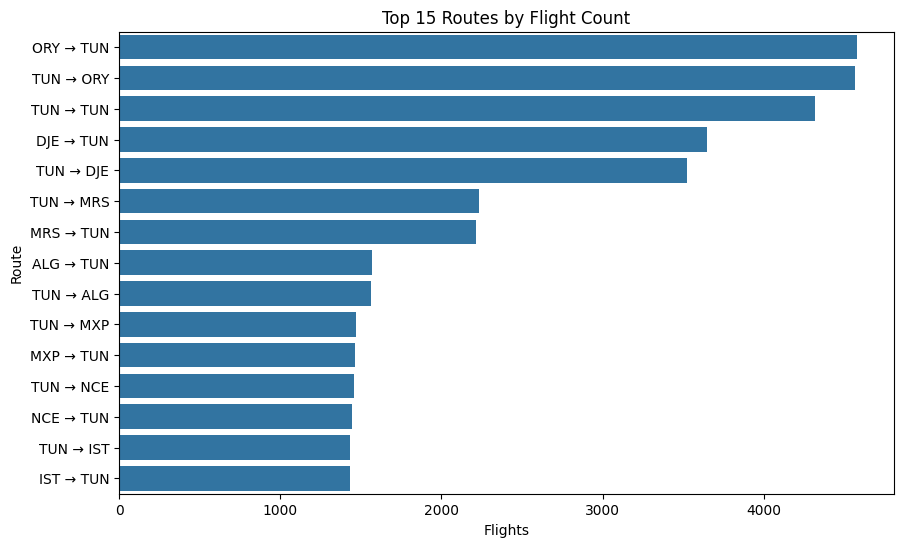

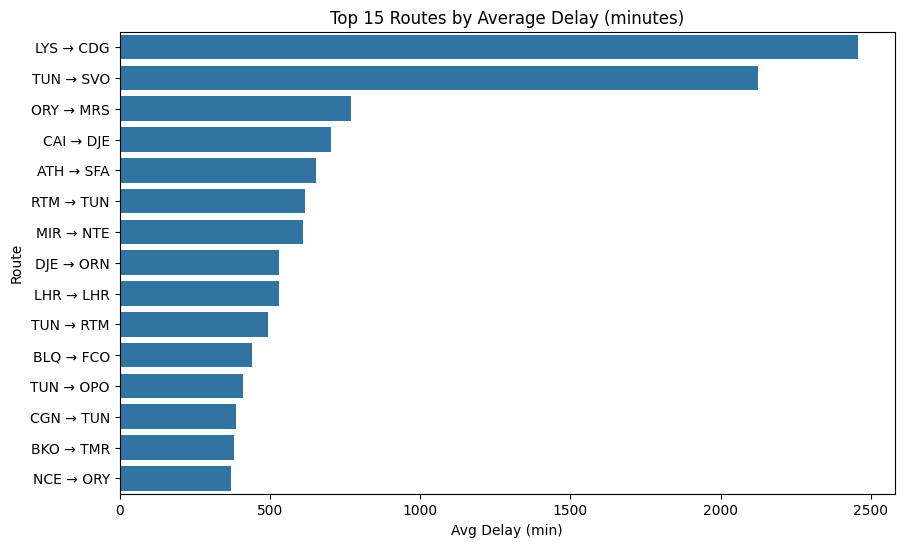

In [26]:

# Visuals for route analysis
import matplotlib.pyplot as plt, seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=route_pivot.head(15)['Flights'].values, y=route_pivot.head(15).index)
plt.title('Top 15 Routes by Flight Count')
plt.xlabel('Flights')
plt.show()

plt.figure(figsize=(10,6))
top_avg = route_pivot.sort_values('Avg_Delay', ascending=False).head(15)
sns.barplot(x=top_avg['Avg_Delay'].values, y=top_avg.index)
plt.title('Top 15 Routes by Average Delay (minutes)')
plt.xlabel('Avg Delay (min)')
plt.show()


## Hour of Day
Pivot (Flights, Avg Delay, Delayed Rate) by dep_hour then line + bar charts.

In [27]:
hour_pivot = df.groupby('dep_hour').agg(Flights=('Route','count'), Avg_Delay=('delay_minutes','mean'), Delayed_Rate=('Is_Delayed','mean')).sort_index()
hour_pivot

,Flights,Avg_Delay,Delayed_Rate
dep_hour,,,
0,2070,80.991787,0.604831
1,1040,76.594231,0.549038
2,464,58.681034,0.446121
3,508,23.429134,0.21063
4,1216,33.069901,0.222039
5,2142,28.454715,0.234827
6,7320,22.759973,0.288388
7,8169,27.608030,0.346064
8,7460,36.680161,0.368365


In [28]:
hour_pivot_desc = df.groupby('dep_hour').agg(Flights=('Route','count'), Avg_Delay=('delay_minutes','mean'), Delayed_Rate=('Is_Delayed','mean')).sort_values('Delayed_Rate', ascending=False)
hour_pivot_desc

,Flights,Avg_Delay,Delayed_Rate
dep_hour,,,
16,8433,72.034626,0.629076
0,2070,80.991787,0.604831
13,7353,54.443628,0.595947
18,4787,63.044496,0.578651
14,7104,58.762106,0.558277
1,1040,76.594231,0.549038
12,5108,51.759005,0.545223
15,6136,56.040906,0.535854
17,4948,62.706144,0.50869


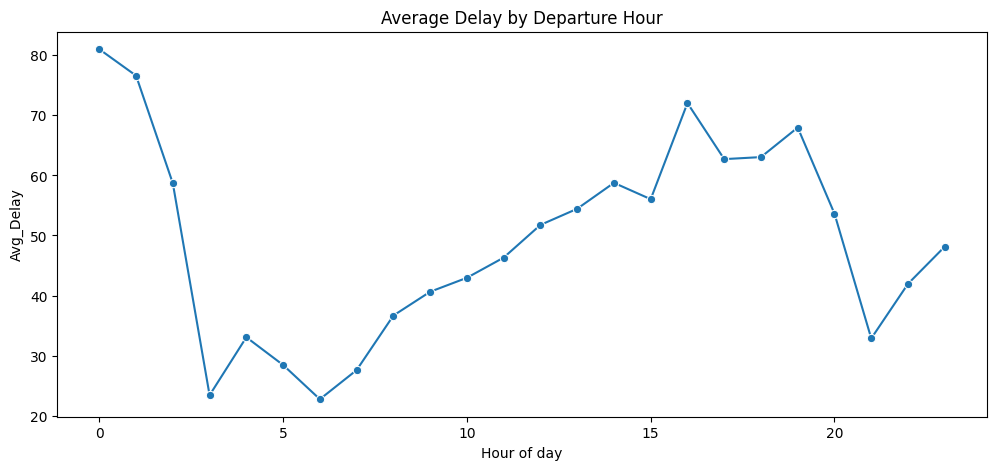

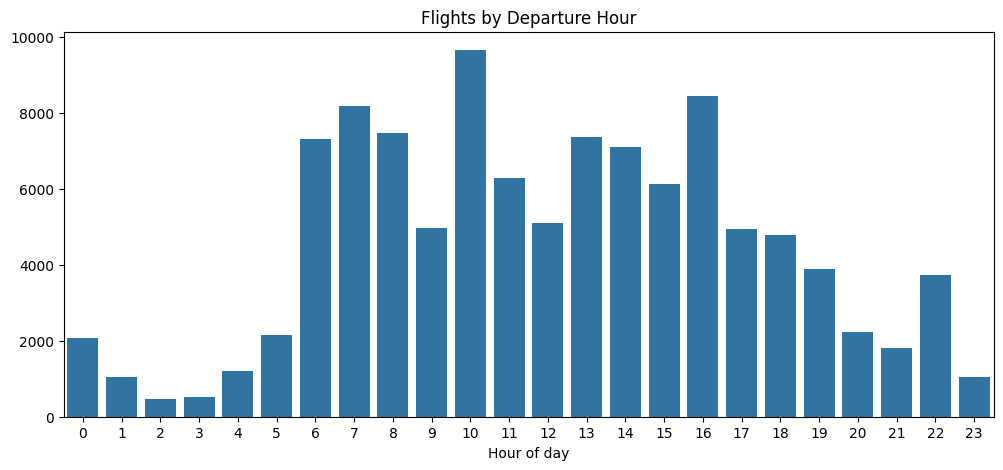

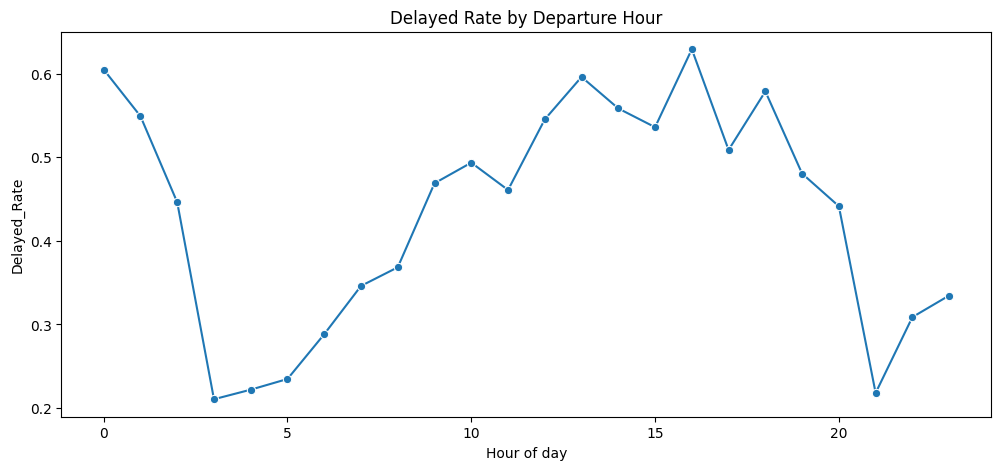

In [29]:

plt.figure(figsize=(12,5))
sns.lineplot(x=hour_pivot.index, y=hour_pivot['Avg_Delay'], marker='o')
plt.title('Average Delay by Departure Hour')
plt.xlabel('Hour of day')
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=hour_pivot.index, y=hour_pivot['Flights'].values)
plt.title('Flights by Departure Hour')
plt.xlabel('Hour of day')
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(x=hour_pivot.index, y=hour_pivot['Delayed_Rate'], marker='o')
plt.title('Delayed Rate by Departure Hour')
plt.xlabel('Hour of day')
plt.show()


## Day of Week
Pivot by dep_dayofweek (ordered) then bar charts for avg delay and delayed rate.

In [30]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_pivot = df.groupby('dep_dayofweek').agg(Flights=('Route','count'), Avg_Delay=('delay_minutes','mean'), Delayed_Rate=('Is_Delayed','mean')).reindex(days)
day_pivot

,Flights,Avg_Delay,Delayed_Rate
dep_dayofweek,,,
Monday,15635,50.455389,0.469076
Tuesday,13814,38.532720,0.418199
Wednesday,14255,42.585479,0.430586
Thursday,15490,47.210781,0.467915
Friday,15932,51.962654,0.497615
Saturday,16485,53.024264,0.472066
Sunday,16222,55.082049,0.500678


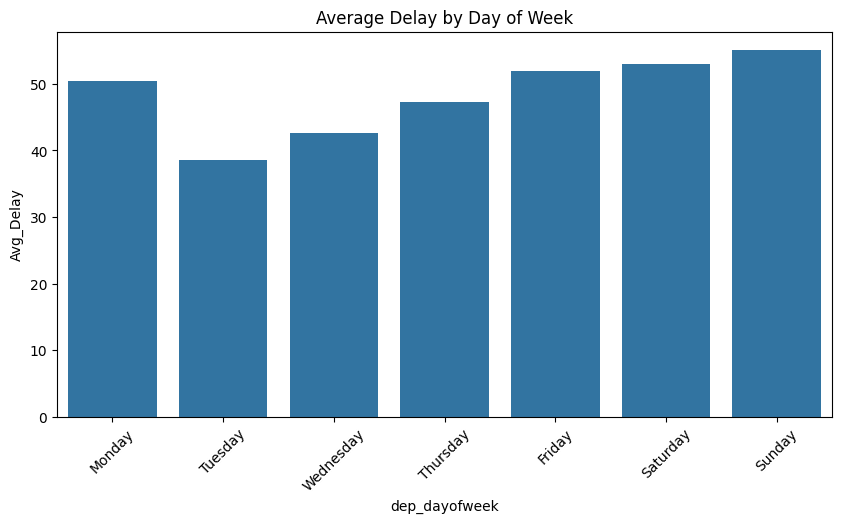

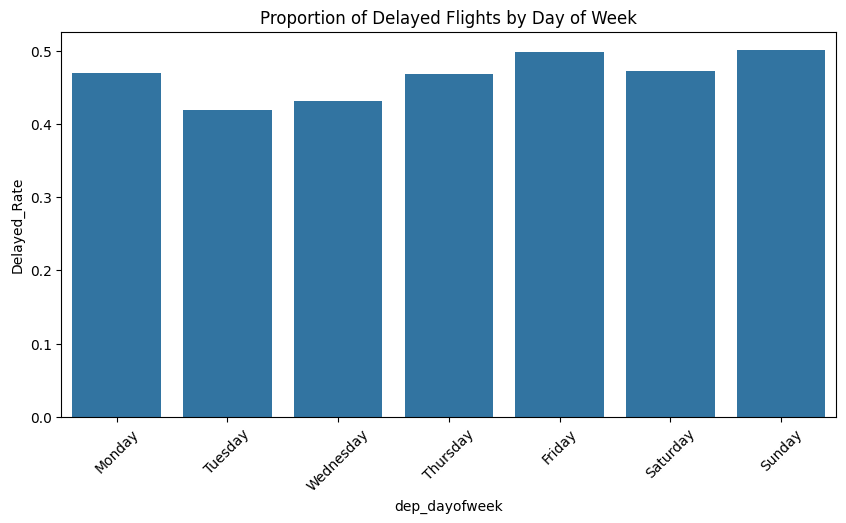

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x=day_pivot.index, y=day_pivot['Avg_Delay'])
plt.title('Average Delay by Day of Week')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=day_pivot.index, y=day_pivot['Delayed_Rate'])
plt.title('Proportion of Delayed Flights by Day of Week')
plt.xticks(rotation=45)
plt.show()

## Monthly Analysis
Pivot by dep_month and plot trend + boxplot distribution.

In [47]:
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
month_pivot = df.groupby('dep_month').agg(Flights=('Route','count'), Avg_Delay=('delay_minutes','mean'), Delayed_Rate=('Is_Delayed','mean')).reindex(months)
month_pivot

,Flights,Avg_Delay,Delayed_Rate
dep_month,,,
January,8688,39.928292,0.430594
February,6608,36.287228,0.416616
March,9132,49.267411,0.479085
April,9433,49.014736,0.463055
May,7584,47.202927,0.453191
June,9538,52.489411,0.449256
July,10896,51.854717,0.499358
August,11903,59.885995,0.531799
September,7587,50.291288,0.484381


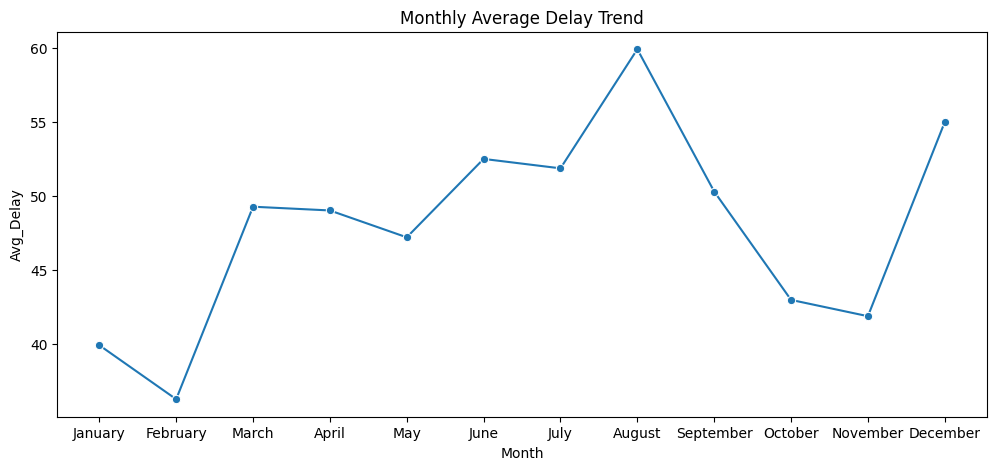

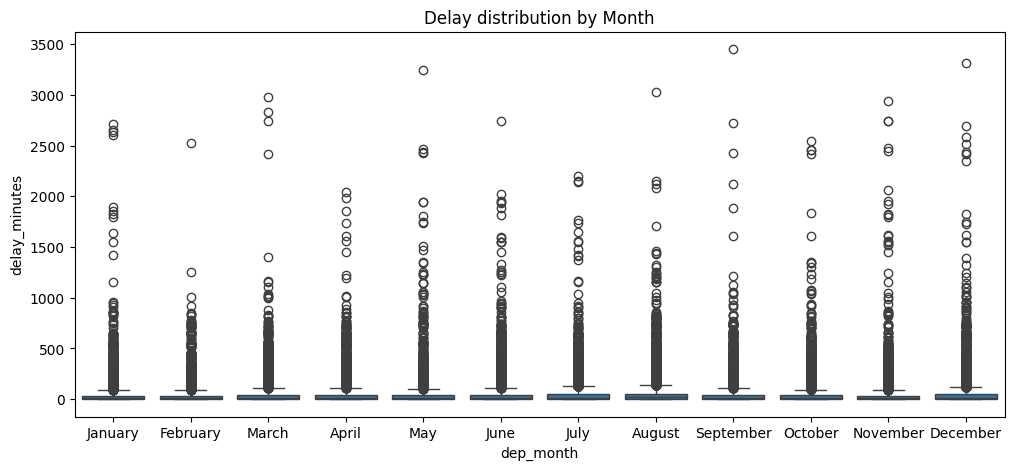

In [48]:
plt.figure(figsize=(12,5))
sns.lineplot(x=month_pivot.index, y=month_pivot['Avg_Delay'], marker='o')
plt.title('Monthly Average Delay Trend')
plt.xlabel('Month')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='dep_month', y='delay_minutes', data=df)
plt.title('Delay distribution by Month')
plt.show()


## Heatmap — Delay minutes by Day of Week vs Hour
Pivot a matrix of avg delay and plot heatmap to identify daily/diurnal patterns.

In [34]:

heat_pivot = df.pivot_table(index='dep_dayofweek', columns='dep_hour', values='delay_minutes', aggfunc='mean').reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
heat_pivot


dep_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dep_dayofweek,,,,,,,,,,,,,,,,,,,,,
Monday,78.475973,77.860335,77.260870,22.116883,33.345455,32.517007,22.269718,29.693267,42.016422,40.474576,...,55.805970,66.272727,67.216749,66.867667,62.292943,78.868687,40.341818,22.269231,41.232176,27.675862
Tuesday,85.535836,70.112500,61.326531,24.966102,27.162996,22.562814,20.675560,25.204683,28.375764,29.703390,...,41.655303,38.324855,54.919444,49.138402,43.730983,50.674374,47.512195,27.290566,33.550347,41.534247
Wednesday,66.154206,73.000000,70.555556,23.604651,37.061404,27.104294,20.580460,28.195203,34.161081,35.692015,...,53.128000,49.608323,59.893839,54.248705,55.744300,58.406375,34.690377,25.639405,31.971377,43.368000
Thursday,56.260073,68.464481,70.760417,15.490909,30.741722,27.344828,24.594697,27.964349,36.002657,43.562712,...,63.708629,50.015045,70.326838,52.929730,57.526685,50.795200,58.733333,28.673152,41.797909,48.267516
Friday,83.647416,79.014085,25.530120,17.352941,39.385057,28.073427,25.113333,27.928631,34.980042,36.964286,...,68.682832,64.770510,74.473645,73.250000,69.438083,79.650909,46.543046,38.713755,50.000000,43.000000
Saturday,97.548263,79.921569,58.035714,16.198113,30.620438,27.221739,22.175000,25.675799,40.227679,50.535227,...,59.418014,69.589057,89.057567,61.130012,71.116466,74.148426,51.457895,34.088123,59.123110,68.418719
Sunday,98.098113,92.370690,53.863636,43.810811,37.765060,32.373913,23.779324,28.354484,38.957322,44.681548,...,64.185714,54.903761,83.364812,74.385204,75.754829,84.519380,85.937143,52.800781,39.117647,57.095238


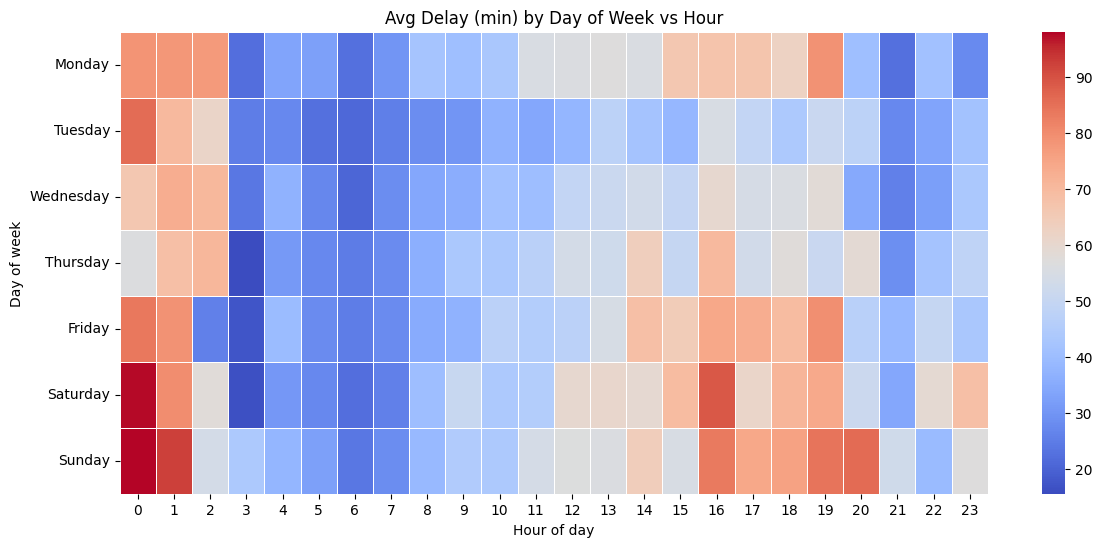

In [35]:
plt.figure(figsize=(14,6))
sns.heatmap(heat_pivot.fillna(0), cmap='coolwarm', linewidths=0.5)
plt.title('Avg Delay (min) by Day of Week vs Hour')
plt.xlabel('Hour of day')
plt.ylabel('Day of week')
plt.show()


## Aircraft Analysis
Pivot by aircraft code for counts and avg delay; visualize top types and boxplots for delay distribution.

In [36]:
ac_pivot = df.groupby('Aircraft_code').agg(Flights=('Route','count'), Avg_Delay=('delay_minutes','mean')).sort_values('Avg_Delay', ascending=False)
ac_pivot.head(20)

,Flights,Avg_Delay
Aircraft_code,,
OL 321ABY,5,205.400000
GJ 734CGC,51,167.705882
5K 345TFX,214,136.906542
GW 320MQH,34,126.147059
GJ 734MGC,225,121.693333
UJ 320TCF,20,118.350000
5M 343SUN,68,116.220588
GJ 734PGC,285,103.094737
5M 343JAI,129,98.085271


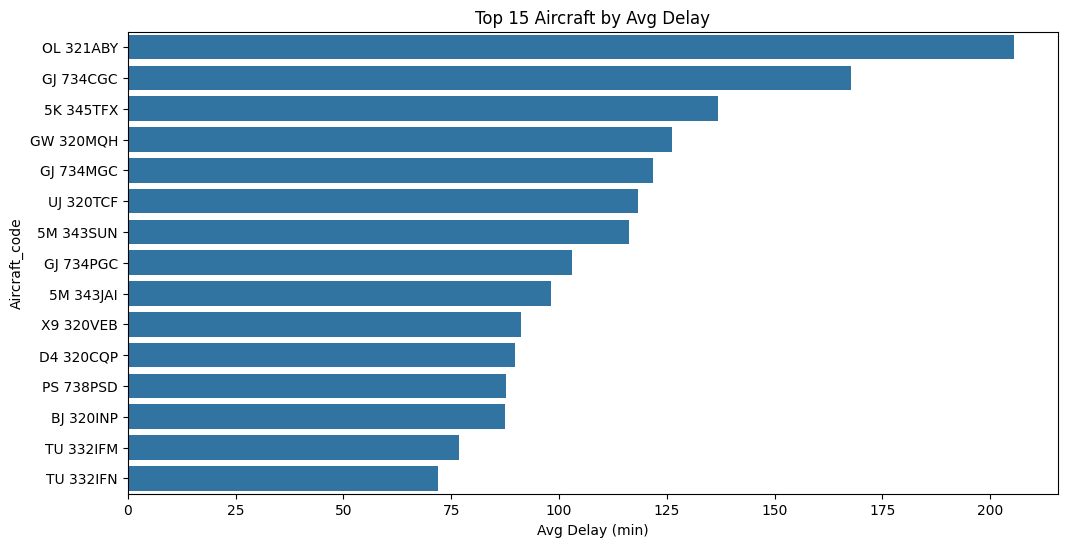

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=ac_pivot.head(15)['Avg_Delay'].values, y=ac_pivot.head(15).index)
plt.title('Top 15 Aircraft by Avg Delay')
plt.xlabel('Avg Delay (min)')
plt.show()


## Distribution & Outliers
Histogram, ECDF, Violin plots and boxplots comparing capped vs raw delays.

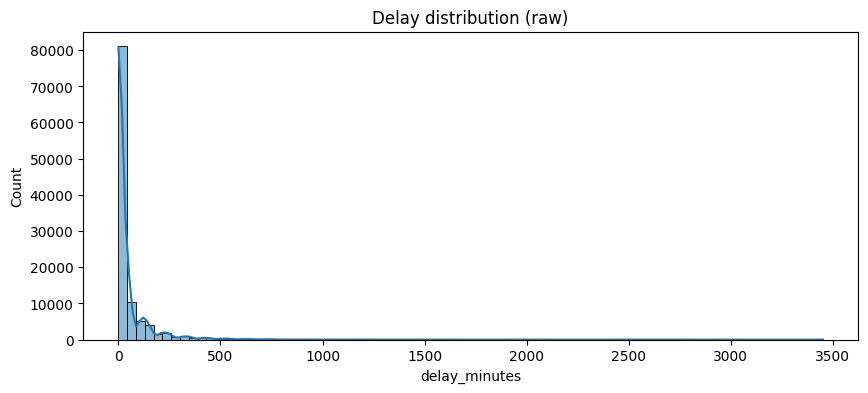

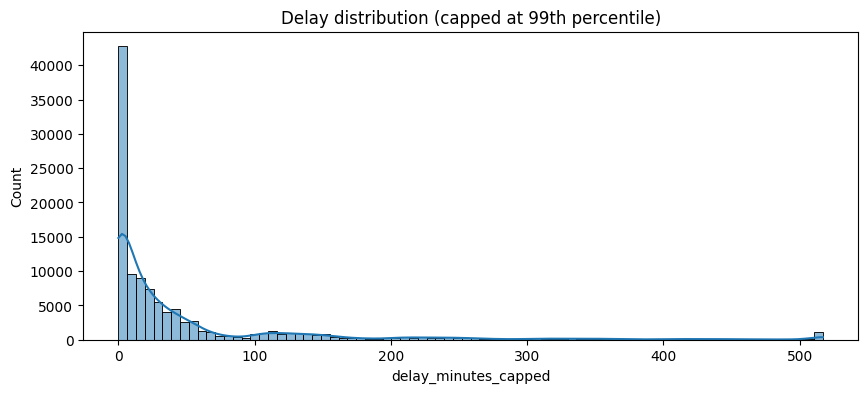

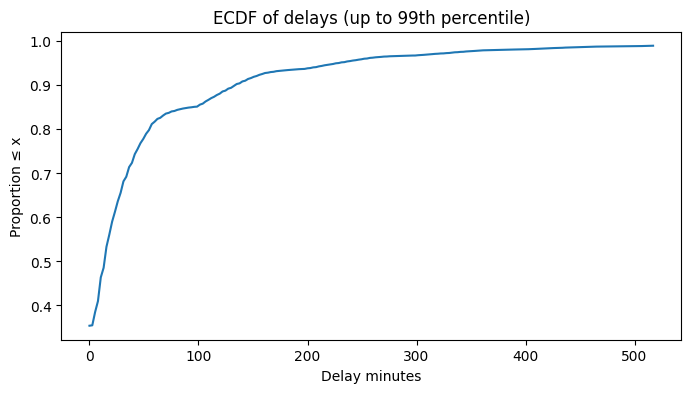

In [38]:

# Histogram raw vs capped
plt.figure(figsize=(10,4))
sns.histplot(df['delay_minutes'].dropna(), bins=80, kde=True)
plt.title('Delay distribution (raw)')
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df['delay_minutes_capped'].dropna(), bins=80, kde=True)
plt.title('Delay distribution (capped at 99th percentile)')
plt.show()

# ECDF (empirical CDF)
from statsmodels.distributions.empirical_distribution import ECDF
if df['delay_minutes'].notna().any():
    ecdf = ECDF(df['delay_minutes'].dropna())
    xs = np.linspace(0, np.nanpercentile(df['delay_minutes'].dropna(), 99), 200)
    plt.figure(figsize=(8,4))
    plt.plot(xs, ecdf(xs))
    plt.title('ECDF of delays (up to 99th percentile)')
    plt.xlabel('Delay minutes')
    plt.ylabel('Proportion ≤ x')
    plt.show()


## Correlations & Pairwise (sample)
Show correlation matrix for numeric features and a small pairplot sample.

Numeric columns detected (excluding constant columns): ['Arrival_delay', 'delay_minutes', 'dep_hour', 'Is_Delayed', 'delay_minutes_capped', 'scheduled_duration_min', 'route_expanding_mean', 'route_rolling_7', 'route_rolling_30']


,Arrival_delay,delay_minutes,dep_hour,Is_Delayed,delay_minutes_capped,scheduled_duration_min,route_expanding_mean,route_rolling_7,route_rolling_30
Arrival_delay,1.000000,1.000000,0.060898,0.414991,0.890589,-0.004158,-0.012196,-0.002372,-0.008012
delay_minutes,1.000000,1.000000,0.060898,0.414991,0.890589,-0.004158,-0.012196,-0.002372,-0.008012
dep_hour,0.060898,0.060898,1.000000,0.070765,0.072959,-0.004332,-0.004765,-0.000761,-0.013946
Is_Delayed,0.414991,0.414991,0.070765,1.000000,0.518510,-0.004031,-0.015727,-0.007824,-0.011266
delay_minutes_capped,0.890589,0.890589,0.072959,0.518510,1.000000,-0.004705,-0.014167,-0.003905,-0.009110
scheduled_duration_min,-0.004158,-0.004158,-0.004332,-0.004031,-0.004705,1.000000,-0.003831,-0.005170,-0.002498
route_expanding_mean,-0.012196,-0.012196,-0.004765,-0.015727,-0.014167,-0.003831,1.000000,0.604017,0.830844
route_rolling_7,-0.002372,-0.002372,-0.000761,-0.007824,-0.003905,-0.005170,0.604017,1.000000,0.717097
route_rolling_30,-0.008012,-0.008012,-0.013946,-0.011266,-0.009110,-0.002498,0.830844,0.717097,1.000000


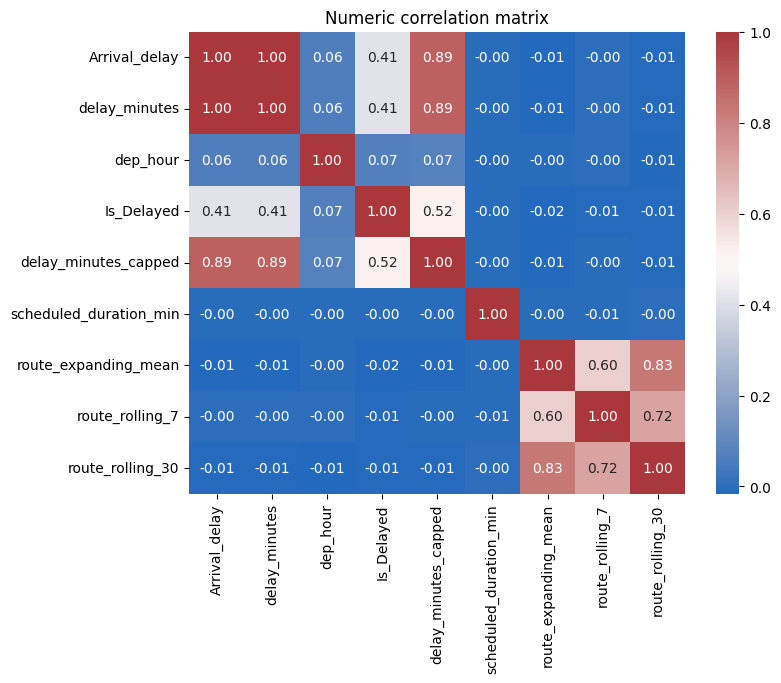

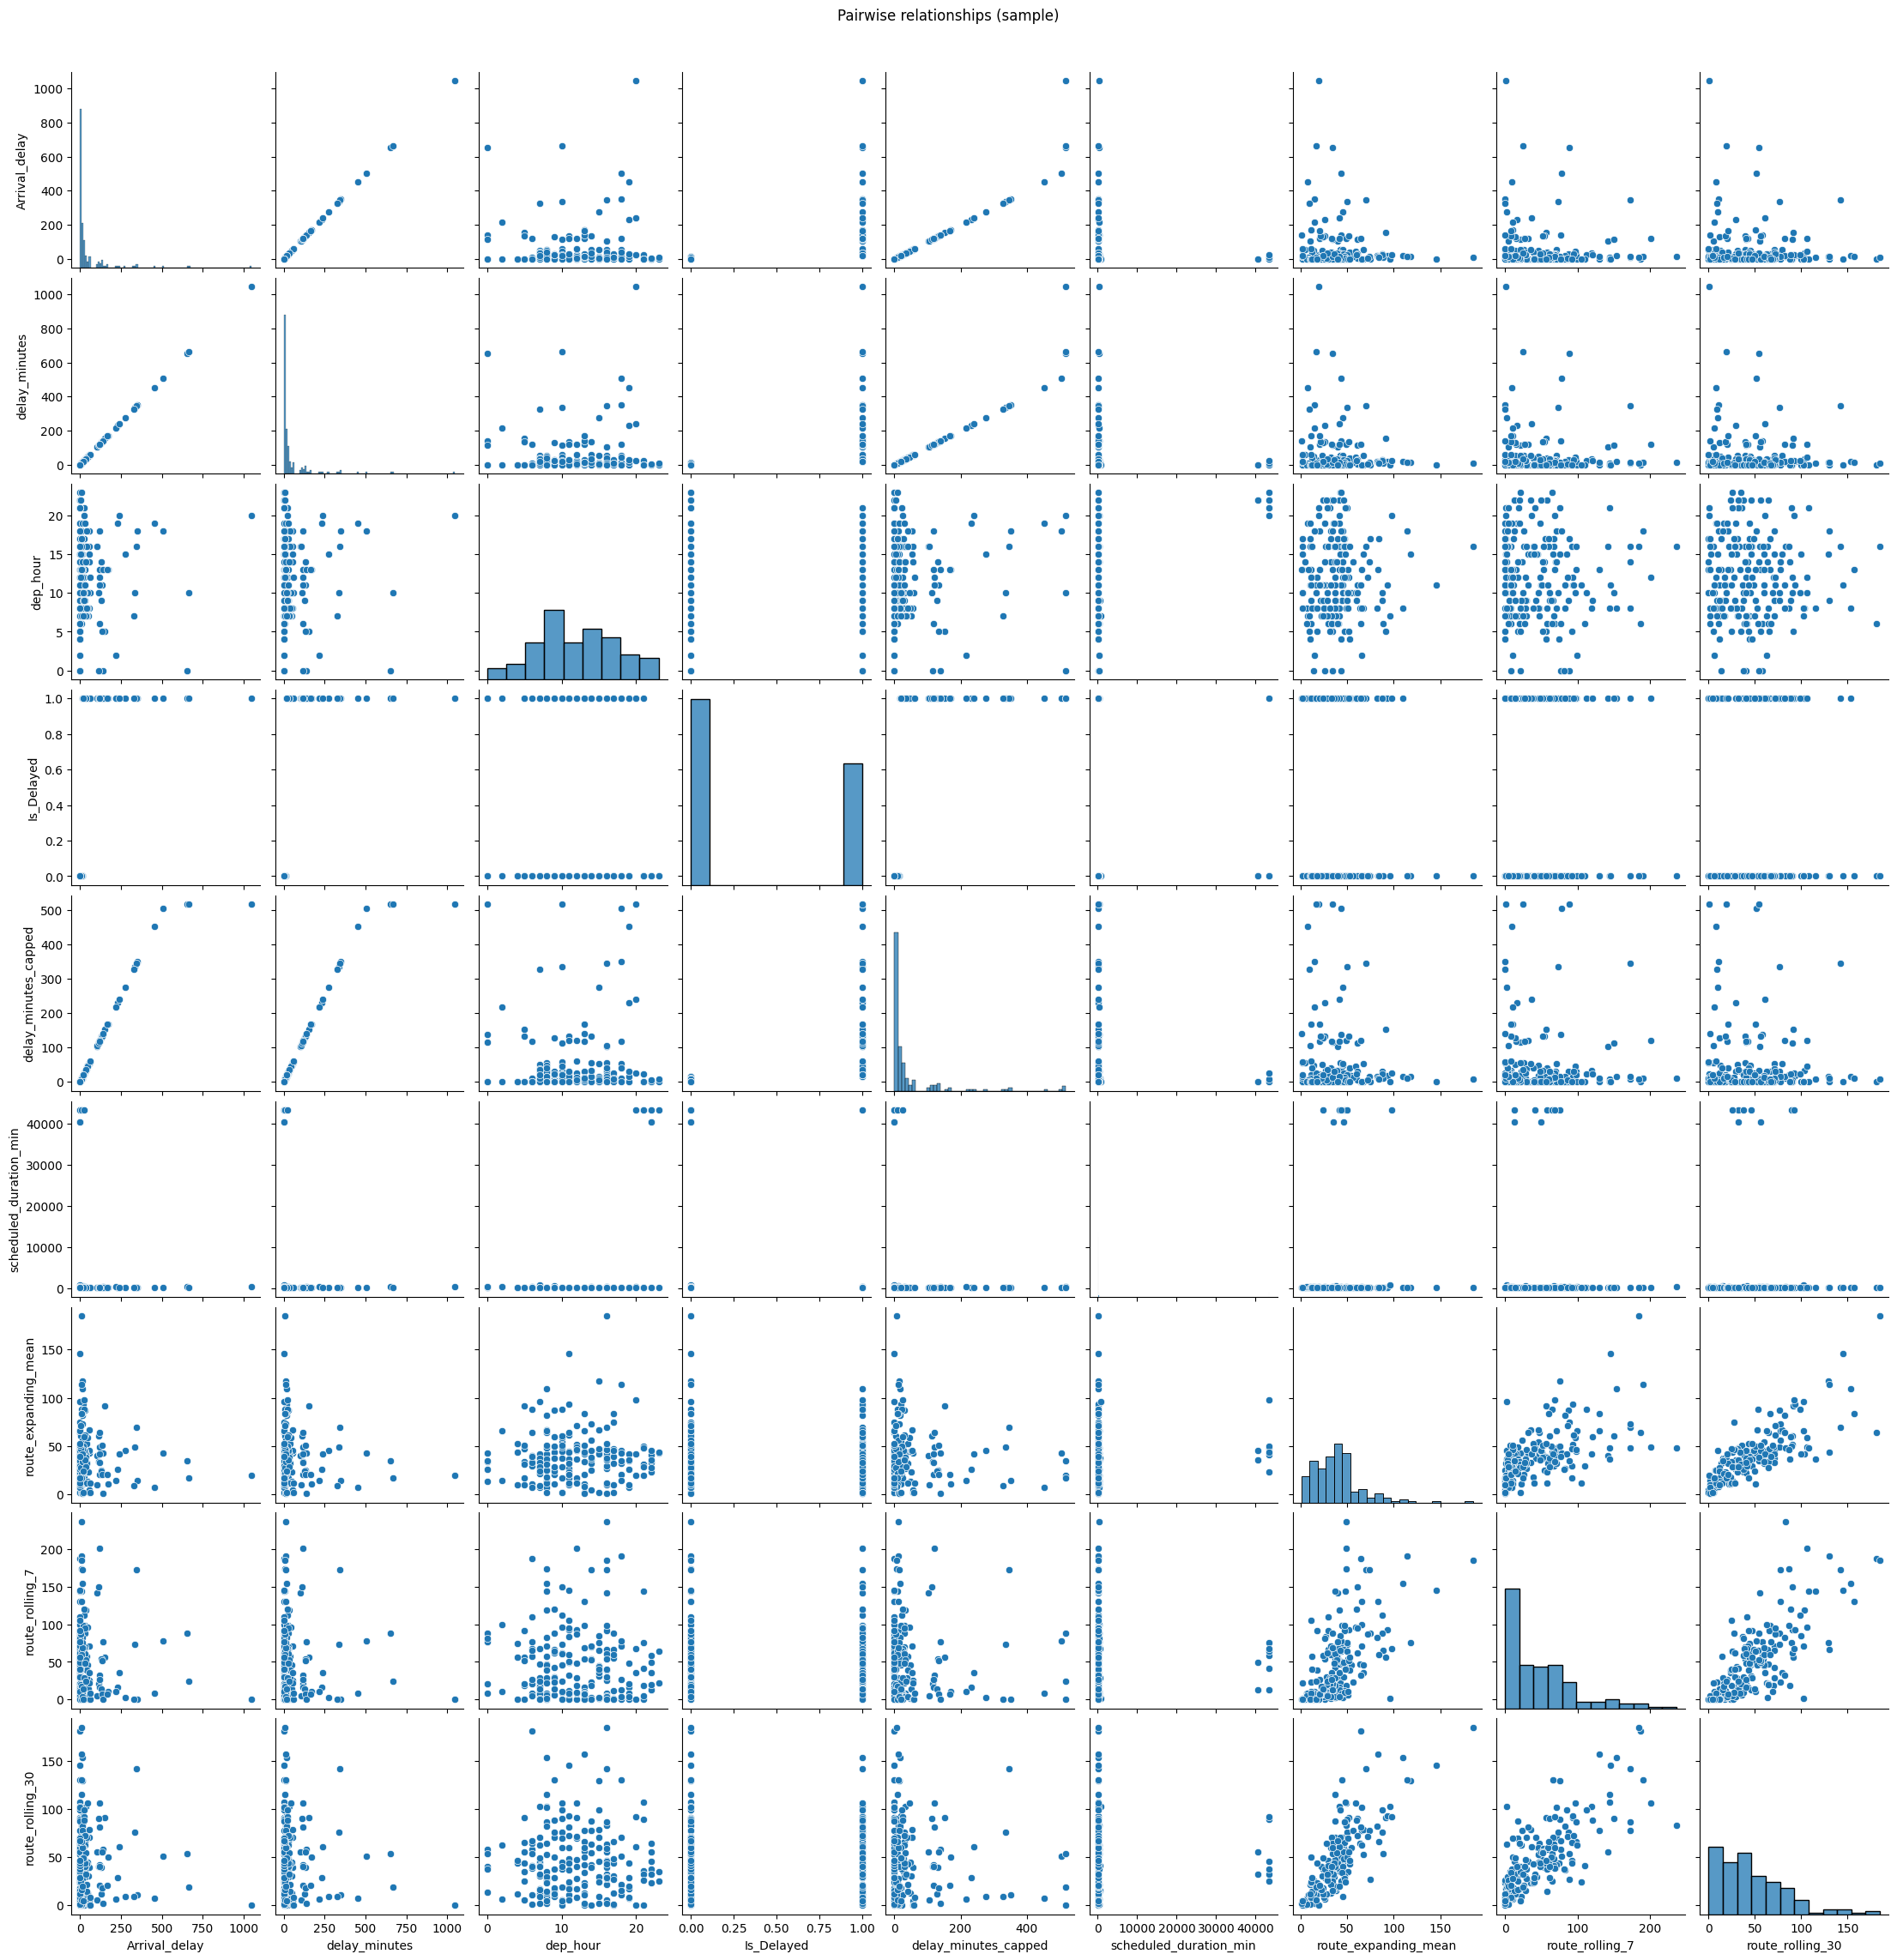

In [39]:
# Exclude numeric columns with no variance (e.g., all 0s or 1s)
num_cols = [c for c in df.columns 
    if pd.api.types.is_numeric_dtype(df[c]) and df[c].nunique(dropna=True) > 1]
print('Numeric columns detected (excluding constant columns):', num_cols)

if len(num_cols) > 1:
    # Correlation matrix
    corr_matrix = df[num_cols].corr()
    display(corr_matrix)

    # Heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='vlag')
    plt.title('Numeric correlation matrix')
    plt.show()
else:
    print('Not enough numeric columns for correlation matrix')

# Pairplot on a small sample
sample = (
    df[num_cols].dropna().sample(n=min(200, len(df)), random_state=42) 
    if len(num_cols) > 1 else None
)

if sample is not None and not sample.empty:
    sns.pairplot(sample)
    plt.suptitle('Pairwise relationships (sample)', y=1.02)
    plt.show()


## Predictive modeling (Logistic Regression & Random Forest)

Features used for modeling: ['Route', 'dep_dayofweek', 'dep_hour', 'dep_month', 'Aircraft_code', 'route_rolling_7', 'route_rolling_30']

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71     14376
           1       0.66      0.74      0.70     12583

    accuracy                           0.70     26959
   macro avg       0.71      0.71      0.70     26959
weighted avg       0.71      0.70      0.70     26959

ROC-AUC (LR): 0.7821722416465742


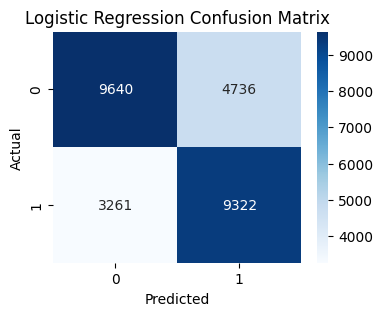


Random Forest classification report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     14376
           1       0.68      0.70      0.69     12583

    accuracy                           0.71     26959
   macro avg       0.71      0.71      0.71     26959
weighted avg       0.71      0.71      0.71     26959

ROC-AUC (RF): 0.789473684937911


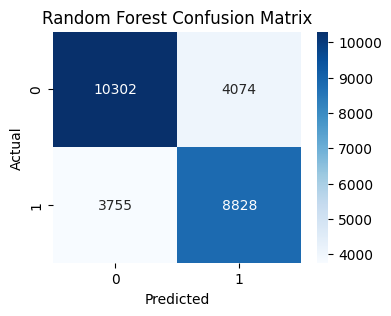

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from packaging import version
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
features = []
for c in ['Route','dep_dayofweek','dep_hour','dep_month','Aircraft_code', 'route_rolling_7', 'route_rolling_30']:
    if c in df.columns:
        features.append(c)
print('Features used for modeling:', features)

if 'Is_Delayed' in df.columns and len(features) > 0 and df['Is_Delayed'].notna().any():
    model_df = df[features + ['Is_Delayed']].dropna()
    X = model_df[features]
    y = model_df['Is_Delayed'].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X.select_dtypes(include=['number']).columns.tolist()

    # ✅ Handle sklearn version compatibility for OneHotEncoder
    if version.parse(sklearn.__version__) >= version.parse("1.2"):
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    else:
        encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

    preprocessor = ColumnTransformer(transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', encoder, cat_cols)
    ])

    # Logistic Regression model
    pipe_lr = Pipeline([
        ('pre', preprocessor),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    pipe_lr.fit(X_train, y_train)
    y_pred_lr = pipe_lr.predict(X_test)
    print('\nLogistic Regression classification report:')
    print(classification_report(y_test, y_pred_lr))
    try:
        print('ROC-AUC (LR):', roc_auc_score(y_test, pipe_lr.predict_proba(X_test)[:, 1]))
    except Exception:
        pass

    
    #  Confusion Matrix for Logistic Regression
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
    plt.title('Logistic Regression Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

    # Random Forest model
    pipe_rf = Pipeline([
        ('pre', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
    ])
    pipe_rf.fit(X_train, y_train)
    y_pred_rf = pipe_rf.predict(X_test)
    print('\nRandom Forest classification report:')
    print(classification_report(y_test, y_pred_rf))
    try:
        print('ROC-AUC (RF):', roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:, 1]))
    except Exception:
        pass


    # Confusion Matrix Plot for RF
    cm = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show   
    
else:
    print('Not enough labeled data or missing features to train models.')


### Comparing & saving best model

In [41]:
import joblib

# --- Compare ROC-AUC scores ---
try:
    auc_lr = roc_auc_score(y_test, pipe_lr.predict_proba(X_test)[:, 1])
except Exception:
    auc_lr = 0

try:
    auc_rf = roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:, 1])
except Exception:
    auc_rf = 0

# --- Select best model ---
if auc_rf > auc_lr:
    best_model = pipe_rf
    best_model_name = 'Random Forest'
    best_auc = auc_rf
else:
    best_model = pipe_lr
    best_model_name = 'Logistic Regression'
    best_auc = auc_lr

# --- Save best model ---
joblib.dump(best_model, 'tunisair_best_model.joblib')
print(f"\n✅ Saved best model: {best_model_name} with ROC-AUC = {best_auc:.4f} to 'tunisair_best_model.joblib'")



✅ Saved best model: Random Forest with ROC-AUC = 0.7895 to 'tunisair_best_model.joblib'


In [43]:
# Predict probabilities using the best model
df['Predicted_Probability'] = best_model.predict_proba(X)[:, 1]

# Save to CSV
df.to_csv("flight_delay_with_predictions.csv", index=False)
print("✅ Predictions saved to 'flight_delay_with_predictions.csv'")

✅ Predictions saved to 'flight_delay_with_predictions.csv'


In [44]:
df.head()

,Flight_date,Flight_ID,Departure_point,Arrival_point,Scheduled_departure_time,Scheduled_arrival_time,STATUS,Aircraft_code,Arrival_delay,scheduled_departure_dt,...,dep_dayofweek,dep_month,delay_missing_flag,Is_Delayed,delay_minutes_capped,scheduled_duration_min,route_expanding_mean,route_rolling_7,route_rolling_30,Predicted_Probability
15674,2016-01-01,TU 0564,NKC,TUN,2016-01-01 00:15:00,2016-01-01 04.30.00,ATA,TU 320IMV,0.0,2016-01-01 00:15:00,...,Friday,January,0,0,0.0,255.0,157.000000,157.000000,157.000000,0.245
15676,2016-01-01,TU 0714,JED,TUN,2016-01-01 00:55:00,2016-01-01 05.30.00,ATA,TU 332IFM,195.0,2016-01-01 00:55:00,...,Friday,January,0,1,195.0,275.0,0.000000,0.000000,0.000000,0.860
15675,2016-01-01,TU 0614,DKR,TUN,2016-01-01 01:20:00,2016-01-01 05.55.00,ATA,TU 320IMU,49.0,2016-01-01 01:20:00,...,Friday,January,0,1,49.0,275.0,49.000000,49.000000,49.000000,0.750
30980,2016-01-01,UG 0002,TUN,DJE,2016-01-01 06:15:00,2016-01-01 07.15.00,SCH,UG AT7LBD,0.0,2016-01-01 06:15:00,...,Friday,January,0,0,0.0,60.0,24.500000,24.500000,24.500000,0.005
7179,2016-01-01,TU 0880,TUN,AMS,2016-01-01 06:30:00,2016-01-01 09.20.00,ATA,TU 736IOP,36.0,2016-01-01 06:30:00,...,Friday,January,0,1,36.0,170.0,16.333333,16.333333,16.333333,0.730


## Model Explanation (SHAP)

We use SHAP to explain the Random Forest classifier (why it predicts a flight as delayed).
This section:
- Loads the saved classifier pipeline (preprocessor + model)
- Computes global (summary) SHAP values (sampled to keep it fast)
- Shows local explanations for any chosen flight (force / bar / waterfall)
Notes:
- Install shap: `pip install shap`
- This cell expects `random_forest_pipeline.joblib` in the working directory (a sklearn Pipeline with 'pre' preprocessor and 'clf' RF).
- If your pipeline uses a different step name, change the string `'pre'` / `'clf'` below to match.


✅ Raw SHAP output shape: (1000, 292, 2)
✅ SHAP matrix shape: (1000, 292), Data matrix shape: (1000, 292)
✅ Feature count: 292
Mean SHAP array shape: (292,)


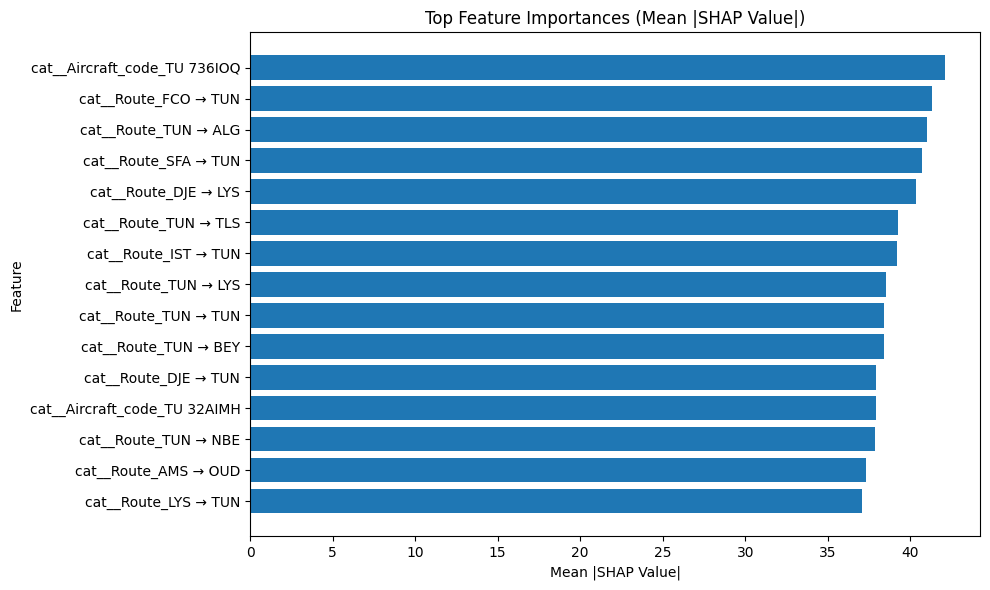

,Feature,Mean |SHAP Value|
283,cat__Aircraft_code_TU 736IOQ,42.119155
64,cat__Route_FCO → TUN,41.299846
165,cat__Route_TUN → ALG,40.984931
151,cat__Route_SFA → TUN,40.727993
41,cat__Route_DJE → LYS,40.376480
214,cat__Route_TUN → TLS,39.264386
78,cat__Route_IST → TUN,39.187310
193,cat__Route_TUN → LYS,38.507895
216,cat__Route_TUN → TUN,38.416880
169,cat__Route_TUN → BEY,38.393457


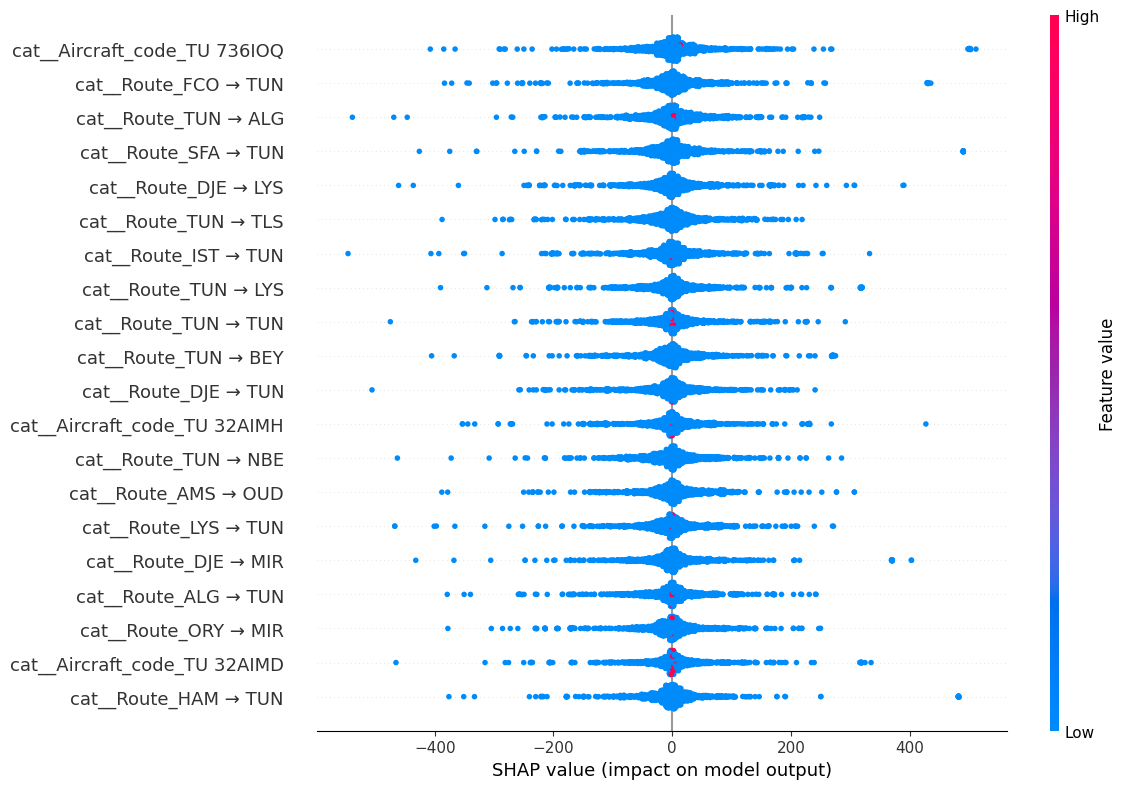

In [53]:
# --- SHAP Feature Importance for Tunisair Flight Delay Model ---
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# ✅ Load the cleaned Tunisair dataset
df = pd.read_csv("Tunisair_flights_cleaned_data.csv")

# --- Define features and target ---
features = [
    'Route', 'dep_dayofweek', 'dep_hour', 'dep_month',
    'Aircraft_code', 'route_rolling_7', 'route_rolling_30'
]
target = 'Is_Delayed'

X = df[features]
y = df[target].astype(int)

# ✅ Sample for faster computation
X_sample, _, y_sample, _ = train_test_split(
    X, y, train_size=1000, random_state=42, stratify=y
)

# --- Preprocessing ---
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# --- Model Pipeline ---
light_model = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=50, random_state=42))
])

light_model.fit(X_sample, y_sample)

# --- Transform data for SHAP ---
X_transformed = light_model.named_steps['pre'].transform(X_sample)
feature_names = light_model.named_steps['pre'].get_feature_names_out()

# --- Compute SHAP values ---
explainer = shap.TreeExplainer(light_model.named_steps['clf'])
shap_values = explainer.shap_values(X_transformed, check_additivity=False)

# ✅ Handle binary-class output: SHAP returns (n_samples, n_features, 2)
shap_values = np.array(shap_values)
print(f"✅ Raw SHAP output shape: {shap_values.shape}")

if shap_values.ndim == 3 and shap_values.shape[2] == 2:
    # Average SHAP values across both classes for interpretability
    shap_values = shap_values.mean(axis=2)

# --- Sanity checks ---
X_transformed = np.array(X_transformed)
print(f"✅ SHAP matrix shape: {shap_values.shape}, Data matrix shape: {X_transformed.shape}")
print(f"✅ Feature count: {len(feature_names)}")

# ============================
# --- 1️⃣ SHAP Mean Importance Bar Plot
# ============================
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# sanity check
print(f"Mean SHAP array shape: {mean_abs_shap.shape}")

# ✅ Align dimensions (in case of mismatch)
if len(mean_abs_shap) != len(feature_names):
    print("⚠️ Mismatch detected between SHAP values and feature names!")
    min_len = min(len(mean_abs_shap), len(feature_names))
    mean_abs_shap = mean_abs_shap[:min_len]
    feature_names = feature_names[:min_len]

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Mean |SHAP Value|": mean_abs_shap
}).sort_values(by="Mean |SHAP Value|", ascending=False)

# --- Bar Plot of Top 15 Features ---
top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"].head(top_n)[::-1],
         importance_df["Mean |SHAP Value|"].head(top_n)[::-1])
plt.title("Top Feature Importances (Mean |SHAP Value|)")
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

display(importance_df.head(15))

# ============================
# --- 2️⃣ SHAP Beeswarm Plot (Detailed)
# ============================
shap.summary_plot(
    shap_values,
    features=X_transformed,
    feature_names=feature_names,
    plot_size=(12, 8),
    show=True
)


In [46]:
import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
df = pd.read_csv("Tunisair_flights_cleaned_data.csv")

# Define features and target
features = ['Route', 'dep_dayofweek', 'dep_hour', 'dep_month',
            'Aircraft_code', 'route_rolling_7', 'route_rolling_30']
target = 'delay_minutes_capped'

X = df[features].copy()
y = df[target].copy()

# -----------------------------
# 2️⃣ Ensure Consistent Data Types
# -----------------------------
cat_cols = ['Route', 'dep_dayofweek', 'dep_month', 'Aircraft_code']
num_cols = ['dep_hour', 'route_rolling_7', 'route_rolling_30']

# Convert categorical columns to string and handle missing values
for col in cat_cols:
    X[col] = X[col].astype(str).fillna("Unknown")

# Ensure numeric columns are clean
for col in num_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# -----------------------------
# 3️⃣ Define Preprocessing
# -----------------------------
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), cat_cols)
])

# -----------------------------
# 4️⃣ Train RandomForest Regressor
# -----------------------------
regressor = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=150,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ))
])

regressor.fit(X, y)

# -----------------------------
# 5️⃣ Save Trained Model
# -----------------------------
joblib.dump(regressor, "tunisair_delay_regressor.joblib")
print("✅ Model trained and saved as tunisair_delay_regressor.joblib")

# -----------------------------
# 6️⃣ Evaluate Model
# -----------------------------
# Predict on same data (quick evaluation — ideally use train/test split)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("\n📊 Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f} minutes")

# -----------------------------
# 7️⃣ Feature Importance Summary
# -----------------------------
# Extract feature names from preprocessor
cat_feature_names = list(
    regressor.named_steps['pre'].named_transformers_['cat']
    .named_steps['encoder'].get_feature_names_out(cat_cols)
)
all_features = num_cols + cat_feature_names

# Match with feature importances
importances = regressor.named_steps['model'].feature_importances_
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Important Features:")
print(feat_imp.head(10))

# -----------------------------
# 8️⃣ Quick Sanity Check
# -----------------------------
sample = X.sample(1, random_state=42)
pred = regressor.predict(sample)
print(f"\n✅ Test Prediction Successful — Sample predicted delay: {pred[0]:.2f} minutes")


✅ Model trained and saved as tunisair_delay_regressor.joblib

📊 Model Performance:
R² Score: 0.179
MAE: 45.66 minutes

🔥 Top 10 Important Features:
                     Feature  Importance
0                   dep_hour    0.145013
2           route_rolling_30    0.089273
1            route_rolling_7    0.085838
712          Route_TUN → TUN    0.070792
179          Route_DJE → TUN    0.036980
644          Route_TUN → DJE    0.030475
821  Aircraft_code_TU CR9ISA    0.018714
747     dep_dayofweek_Sunday    0.015792
823  Aircraft_code_UG AT7AT7    0.014853
825  Aircraft_code_UG AT7LBE    0.013926

✅ Test Prediction Successful — Sample predicted delay: 24.95 minutes
